<h1><center>
    CPT_S 434/534 Neural network design and application
</center></h1>

<!-- <h2><center>CPT_S 434/534</center></h2> -->

<h2><center>HW 3: CNNs -- code (80 pts)</center></h2>

### Name: *Osaze Ogieriakhi*
### Student ID: *11784953*

## This assignment includes:

## Coding in Python (PyTorch) and answering questions: train CNNs on MNIST and CIFAR-10 (80 points)

### Step 0: Install and configure: python ([Anaconda platform](https://docs.anaconda.com/anaconda/install/) recommended), [Jupyter Notebook](https://jupyter.org/install), [pytorch](https://pytorch.org/get-started/), [torchvision](https://anaconda.org/pytorch/torchvision), etc.

**Remark 1.** [Colab](https://colab.research.google.com) is a cloud platform that enables your Jupyter Notebooks (including this .ipynb assignment) to run with different runtime types (hardware acceleration is possible using GPU or TPU). You may also choose Colab to finish assignments (future assignments may require extensive computation that may be time-consuming on your laptop such as 1 or 2 hours).

**Remark 2.** If you use Colab, make sure the working path/directory is the current one. See [this page](https://stackoverflow.com/questions/48298146/changing-directory-in-google-colab-breaking-out-of-the-python-interpreter).

**Remark 3.** If you use Colab, it is still required to convert your .ipynb to .html and submit **BOTH** files to Canvas. See [this page](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) on how to convert to .html using Colab

### Step 1: Read provided code (with pytorch) to understand the implementation logic of CNN models, so that you know how to implement in the following step and how to re-use the provided code

### Step 2: Complete the question/code of CNNs (80 pts)

#### 1) draw a graph to show the structure of CNN (5 pts)

#### 2) train a feedforwd network and a CNN on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) (15 pts x 2 = 30 pts)

#### 3) train a ResNet with 4 blocks (15 pts)

#### 4) answer: how to organize the image directories/folders to use the generic data loader (5 pts)

#### 5) explain how ResNet implements the shortcut connection (5 pts)

#### 6) fine-tune pre-trained AlexNet or VGG on CIFAR-10 (20 pts)


### Step 3: Record and plot results to show accuracy convergence (against #epoch), excpet the section where other instructions are present for how to show results

## $\color{red}{\text{Submission:}}$

* Convert the .ipynb file to .html file (**save the execution outputs** to show your progress: otherwise grading may be affected)
    
* Upload **both** your .ipynb and .html files to Canvas separately (not zip them to a single zip file).

* Plots should be clear and easy to read.

## Special tips for this assignment:

* Fact: we will train relatively large-scale models (AlexNet, ResNet, etc.) on relatively large-scale datasets (CIFAR-10)

* Computational burden: training a larger model on a larger dataset may requires sigfinicant more extensive computational cost. For example, in Section 8, after finishing coding, fine-tuning AlexNet for 10 epochs on CIFAR-10 using the tutorial mentioned therein may spend more than 160 mins on a laptop

* However, fine-tuning AlelxNet for 10 epochs using the same code on [Colab](https://colab.research.google.com) (free plan) may only spend less than 35 min (yes, it is still much more complicated than linear and one or two hidden layer MLPs in HW1 and HW2)

* **To finish this assignment efficiently, it would be highly recommended to use the cloud platform [Colab](https://colab.research.google.com).**

* There is an option on [Colab](https://colab.research.google.com) to "Upload" a file, which is easy to use

* Section 4 and 5 for training ResNet from scratch may also require extensive computation

## 1. (Read and run) Train a feedforward neural netwwork with one hidden layer (one hidden layer = one linear layer + one nonlinear layer) on MNIST

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.59MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Step [100/600], Loss: 0.2847
Epoch [1/10], Step [200/600], Loss: 0.2550
Epoch [1/10], Step [300/600], Loss: 0.2589
Epoch [1/10], Step [400/600], Loss: 0.1589
Epoch [1/10], Step [500/600], Loss: 0.2527
Epoch [1/10], Step [600/600], Loss: 0.1171
Accuracy of the network on the 10000 test images: 95.48 %
Accuracy of the network on the training images: 95.87333333333333 %
Epoch [2/10], Step [100/600], Loss: 0.0610
Epoch [2/10], Step [200/600], Loss: 0.0629
Epoch [2/10], Step [300/600], Loss: 0.0717
Epoch [2/10], Step [400/600], Loss: 0.2115
Epoch [2/10], Step [500/600], Loss: 0.0758
Epoch [2/10], Step [600/600], Loss: 0.0438
Accuracy of the network on the 10000 test images: 97.27 %
Accuracy of the network on the training images: 97.78833333333333 %
Epoch [3/10], Step [100/600], Loss: 0.1638
Epoch [3/10], Step [200/600], Loss: 0.0322
Epoch [3/10], Step [300/600], Loss: 0.0744
Epoch [3/10], Step [400/600]

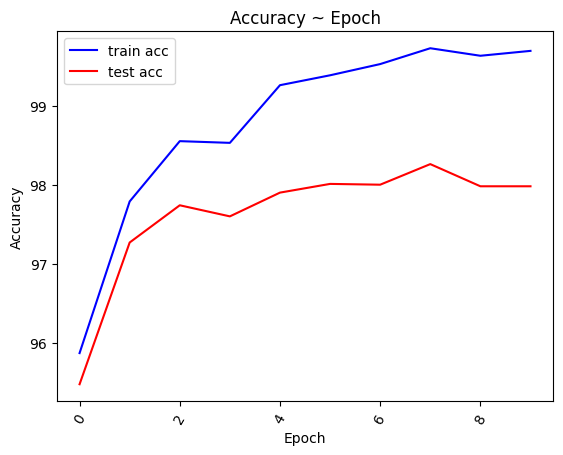

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy

# Hyper-parameters for MNIST
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


model_NN = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_NN.parameters(), lr=learning_rate, weight_decay=0.00001)

# Train the model_NN
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_NN(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model_NN
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model_NN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model_NN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)



plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()


# Save the model_NN checkpoint
torch.save(model_NN.state_dict(), 'model_NN.ckpt')

## 2. (Read, run and answer the question, 5 points) Train a convolutional neural network on MNIST.

**Question** (5 pts): Can you draw a structure graph (following the right side of Figure 9.7 in [deep learning book](https://www.deeplearningbook.org/contents/convnets.html), or Figure 3 in [ResNet](https://arxiv.org/pdf/1512.03385.pdf)) to present the structure of this convolutional network?

Hint 1: You may use the following code to include a pdf file into this .ipynb file:
<img src="test.pdf"> (if you cannot see the source code, double click this cell)

Hint 2: NO need to include all details such as the size and number of convolutional filters. Simply show the type of each layer and the order of all layers.

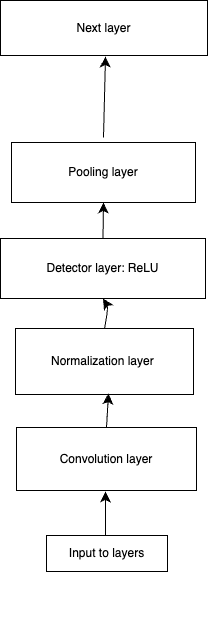

**Your answer:**
<img src="CNN.pdf">

Epoch [1/10], Step [100/600], Loss: 0.1160
Epoch [1/10], Step [200/600], Loss: 0.1030
Epoch [1/10], Step [300/600], Loss: 0.0562
Epoch [1/10], Step [400/600], Loss: 0.1428
Epoch [1/10], Step [500/600], Loss: 0.0310
Epoch [1/10], Step [600/600], Loss: 0.0553
Test Accuracy of the model_conv on the 10000 test images: 98.28 %
Test Accuracy of the model_conv on the train images: 98.26833333333333 %
Epoch [2/10], Step [100/600], Loss: 0.1094
Epoch [2/10], Step [200/600], Loss: 0.0401
Epoch [2/10], Step [300/600], Loss: 0.0127
Epoch [2/10], Step [400/600], Loss: 0.0218
Epoch [2/10], Step [500/600], Loss: 0.0090
Epoch [2/10], Step [600/600], Loss: 0.0341
Test Accuracy of the model_conv on the 10000 test images: 98.89 %
Test Accuracy of the model_conv on the train images: 99.085 %
Epoch [3/10], Step [100/600], Loss: 0.0341
Epoch [3/10], Step [200/600], Loss: 0.0296
Epoch [3/10], Step [300/600], Loss: 0.0666
Epoch [3/10], Step [400/600], Loss: 0.0358
Epoch [3/10], Step [500/600], Loss: 0.0139
Ep

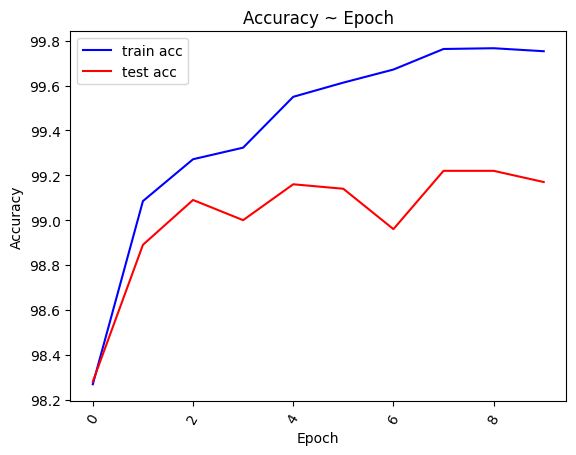

In [2]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


model_conv = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_conv.parameters(), lr=learning_rate)

# Train the model_conv
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_conv(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model_conv
    model_conv.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_conv(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model_conv on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_conv(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model_conv on the train images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)



plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()


# Save the model_conv checkpoint
torch.save(model_conv.state_dict(), 'model_conv.ckpt')

## 3. (To finish, 15 pts for feedforward neural network and 15 pts for CNNs, totally 30 pts) Read [this document](https://pytorch.org/vision/0.8/datasets.html) (more precisely [this section](https://pytorch.org/vision/0.8/datasets.html#cifar)) of **torchvision.datasets** and learn how to use it to load the benchmark datasets. Now train a feedforward neurral network and a convolutional neural network on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), respectively. Their structures can be the same with those used in Section 1 and 2.

NOTE: since now we train models on a different dataset, the hyper-parameters used on MNIST may not necessarily fit CIFAR_10. You may change the hyper-parameters, e.g., num_epochs, learning_rate, batch_size, etc., to find a reasonable accuracy. A suggestion is to set num_epoch=50, batch_size=100. You may explore what could be a good choice for learning_rate from [0.0001, 0.001] for both networks. Finally your feedforward network should achieve around **52%** testing accuracy and CNN achieve **68%** testing accuracy.

Files already downloaded and verified
Epoch [1/50], Train Acc: 42.14%, Test Acc: 46.84%
Epoch [2/50], Train Acc: 48.86%, Test Acc: 48.46%
Epoch [3/50], Train Acc: 52.24%, Test Acc: 49.29%
Epoch [4/50], Train Acc: 55.11%, Test Acc: 51.03%
Epoch [5/50], Train Acc: 57.38%, Test Acc: 50.94%
Epoch [6/50], Train Acc: 59.63%, Test Acc: 50.81%
Epoch [7/50], Train Acc: 61.75%, Test Acc: 50.67%
Epoch [8/50], Train Acc: 64.03%, Test Acc: 52.42%
Epoch [9/50], Train Acc: 65.83%, Test Acc: 51.83%
Epoch [10/50], Train Acc: 67.58%, Test Acc: 51.37%
Epoch [11/50], Train Acc: 69.28%, Test Acc: 53.54%
Epoch [12/50], Train Acc: 70.94%, Test Acc: 52.77%
Epoch [13/50], Train Acc: 72.35%, Test Acc: 51.77%
Epoch [14/50], Train Acc: 73.99%, Test Acc: 51.96%
Epoch [15/50], Train Acc: 75.39%, Test Acc: 50.88%
Epoch [16/50], Train Acc: 76.83%, Test Acc: 53.00%
Epoch [17/50], Train Acc: 78.16%, Test Acc: 52.09%
Epoch [18/50], Train Acc: 78.26%, Test Acc: 51.85%
Epoch [19/50], Train Acc: 79.87%, Test Acc: 52.39%
Ep

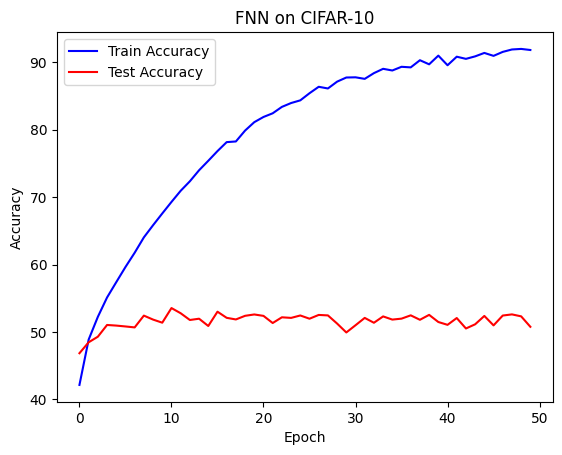

In [6]:
# Your code goes here
# ----------- feedforward neural network -----------
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters for CIFAR-10
input_size = 32 * 32 * 3  # Flatten 32x32x3 images
hidden_size = 1000  # Increased hidden layer size
num_classes = 10
num_epochs = 50
batch_size = 100
learning_rate = 0.001

# Data transformations (Normalize to improve learning)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize RGB channels
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Fully Connected Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Model, Loss, and Optimizer
model_NN = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_NN.parameters(), lr=learning_rate, weight_decay=1e-5)

# Training Loop
train_acc_list, test_acc_list = [], []
for epoch in range(num_epochs):
    model_NN.train()
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model_NN(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Testing
    model_NN.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_NN(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100 * correct / total
    test_acc_list.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

# Save Model
torch.save(model_NN.state_dict(), 'model_NN_CIFAR10.pth')

# Plot Accuracy
plt.plot(train_acc_list, '-b', label='Train Accuracy')
plt.plot(test_acc_list, '-r', label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FNN on CIFAR-10')
plt.show()


Epoch [1/50], Train Acc: 53.32%, Test Acc: 64.11%
Epoch [2/50], Train Acc: 66.62%, Test Acc: 67.87%
Epoch [3/50], Train Acc: 70.95%, Test Acc: 69.26%
Epoch [4/50], Train Acc: 74.25%, Test Acc: 72.23%
Epoch [5/50], Train Acc: 76.40%, Test Acc: 72.12%
Epoch [6/50], Train Acc: 78.34%, Test Acc: 73.56%
Epoch [7/50], Train Acc: 79.82%, Test Acc: 73.02%
Epoch [8/50], Train Acc: 81.70%, Test Acc: 72.85%
Epoch [9/50], Train Acc: 82.84%, Test Acc: 73.97%
Epoch [10/50], Train Acc: 84.10%, Test Acc: 75.52%
Epoch [11/50], Train Acc: 85.22%, Test Acc: 75.38%
Epoch [12/50], Train Acc: 86.12%, Test Acc: 74.55%
Epoch [13/50], Train Acc: 87.12%, Test Acc: 75.20%
Epoch [14/50], Train Acc: 88.51%, Test Acc: 74.36%
Epoch [15/50], Train Acc: 89.21%, Test Acc: 72.93%
Epoch [16/50], Train Acc: 90.09%, Test Acc: 74.13%
Epoch [17/50], Train Acc: 90.81%, Test Acc: 73.15%
Epoch [18/50], Train Acc: 91.34%, Test Acc: 73.35%
Epoch [19/50], Train Acc: 92.06%, Test Acc: 73.88%
Epoch [20/50], Train Acc: 92.81%, Test A

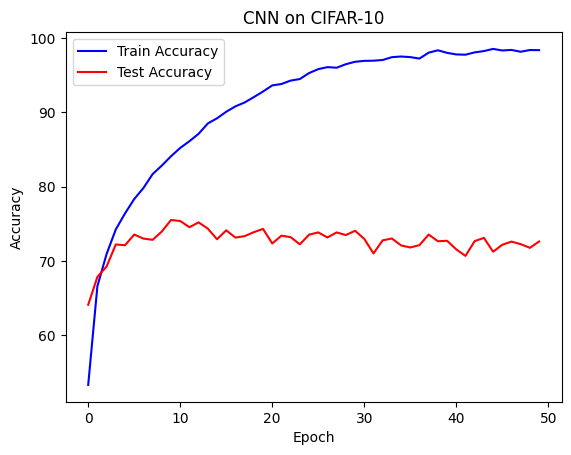

In [7]:
# ----------- convolutional neural network -----------

class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),  # 3 input channels for RGB
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = nn.Linear(8 * 8 * 64, num_classes)  # Adjusted fully connected layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# Model, Loss, and Optimizer
model_conv = ConvNet(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_conv.parameters(), lr=learning_rate)

# Training Loop
train_acc_list, test_acc_list = [], []
for epoch in range(num_epochs):
    model_conv.train()
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model_conv(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Testing
    model_conv.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_conv(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100 * correct / total
    test_acc_list.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

# Save Model
torch.save(model_conv.state_dict(), 'model_conv_CIFAR10.pth')

# Plot Accuracy
plt.plot(train_acc_list, '-b', label='Train Accuracy')
plt.plot(test_acc_list, '-r', label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN on CIFAR-10')
plt.show()


## 4. (Read and run) Train a ResNet with three blocks on CIFAR-10

100%|██████████| 170M/170M [00:12<00:00, 13.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data/
Epoch [1/45], Step [100/500] Loss: 1.5242
Epoch [1/45], Step [200/500] Loss: 1.3642
Epoch [1/45], Step [300/500] Loss: 1.3070
Epoch [1/45], Step [400/500] Loss: 1.2541
Epoch [1/45], Step [500/500] Loss: 1.2902
Accuracy of the model on the test images: 51.12 %
Accuracy of the model on the train images: 52.566 %
Epoch [2/45], Step [100/500] Loss: 1.0110
Epoch [2/45], Step [200/500] Loss: 1.0283
Epoch [2/45], Step [300/500] Loss: 1.0587
Epoch [2/45], Step [400/500] Loss: 0.8083
Epoch [2/45], Step [500/500] Loss: 0.8757
Accuracy of the model on the test images: 64.82 %
Accuracy of the model on the train images: 64.998 %
Epoch [3/45], Step [100/500] Loss: 0.8454
Epoch [3/45], Step [200/500] Loss: 0.7303
Epoch [3/45], Step [300/500] Loss: 0.9878
Epoch [3/45], Step [400/500] Loss: 0.8040
Epoch [3/45], Step [500/500] Loss: 0.6370
Accuracy of the model on the test images: 69.61 %
Accuracy of the model on the train images: 70.932 %
Epoch [4/45]

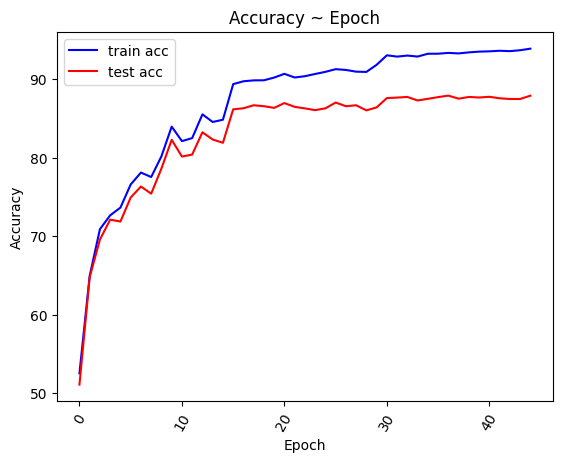

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 45
batch_size = 100
learning_rate = 0.001

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True,
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                            train=False,
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = ResNet(ResidualBlock, [2, 2, 2]).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
train_acc_list, test_acc_list = [], []
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 15 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    test_acc_list.append(100 * correct / total)


    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the train images: {} %'.format(100 * correct / total))
    train_acc_list.append(100 * correct / total)

    model.train()


plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()



# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')

Let's regard one time call of "make_layer" as one block, so the example code builds three blocks.

The line "self.layer1 = self.make_layer(block, 16, layers[0])" builds the first block.

The line "self.layer2 = self.make_layer(block, 32, layers[1], 2)" builds the second block.

The line "self.layer3 = self.make_layer(block, 64, layers[2], 2)" builds the third block.

## 5. (To finish, 15 points) Train a ResNet with four blocks. The previous three blocks are the same with Section 5 and the fourth block has the same output channels with the third one. Implement this structure with the code in Section 5.


Hint: it is OK to use the same hyper-parameters, i.e., num_epochs, batch_size and learning rate, as in Section 4

In [8]:
# Your code goes here.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F


class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        out += identity  # Skip connection
        out = self.relu(out)

        return out


def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)  # Initial convolution
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.layer4 = self.make_layer(block, 64, layers[3], 2)
        self.avg_pool = self.avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc = nn.Linear(64, num_classes)  # Fully connected output layer

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model with 4 layers (ResNet-4)
layers = [2, 2, 2, 2]  # Number of residual blocks in each layer
model = ResNet(BasicBlock, layers, num_classes=10).to(device)

transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True,
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                            train=False,
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_acc = 100 * correct / total
print(f"Test Accuracy: {val_acc:.2f}%")

torch.save(model.state_dict(), "resnet4.pth")


Files already downloaded and verified
Epoch 1/10, Loss: 1.3285, Accuracy: 51.68%
Epoch 2/10, Loss: 0.8831, Accuracy: 68.79%
Epoch 3/10, Loss: 0.6916, Accuracy: 75.67%
Epoch 4/10, Loss: 0.5687, Accuracy: 80.16%
Epoch 5/10, Loss: 0.4814, Accuracy: 83.21%
Epoch 6/10, Loss: 0.4143, Accuracy: 85.54%
Epoch 7/10, Loss: 0.3493, Accuracy: 87.80%
Epoch 8/10, Loss: 0.2942, Accuracy: 89.66%
Epoch 9/10, Loss: 0.2449, Accuracy: 91.31%
Epoch 10/10, Loss: 0.2073, Accuracy: 92.72%
Test Accuracy: 54.90%


## 6. (Answer, 5 points) Suppose you collect an image dataset. Now you plan to train a convolutional neural network on your own data and then test its accuracy. As we did in previous sections, you would like to use **torchvision.datasets** to load your data. How would you organize your image directories/folders in order to use the generic data loader of **torchvision.datasets**?

Please describe the arrangement of your directories/folders and write down how would you like to use [**torchvision.datasets**](https://pytorch.org/vision/0.8/datasets.html) (particularly [this section](https://pytorch.org/vision/0.8/datasets.html#datasetfolder) or [this section](https://pytorch.org/vision/0.8/datasets.html#imagefolder)) as a data loader for your case.

(You may display an image or use text to describe the arrangement of the directories/folders.)

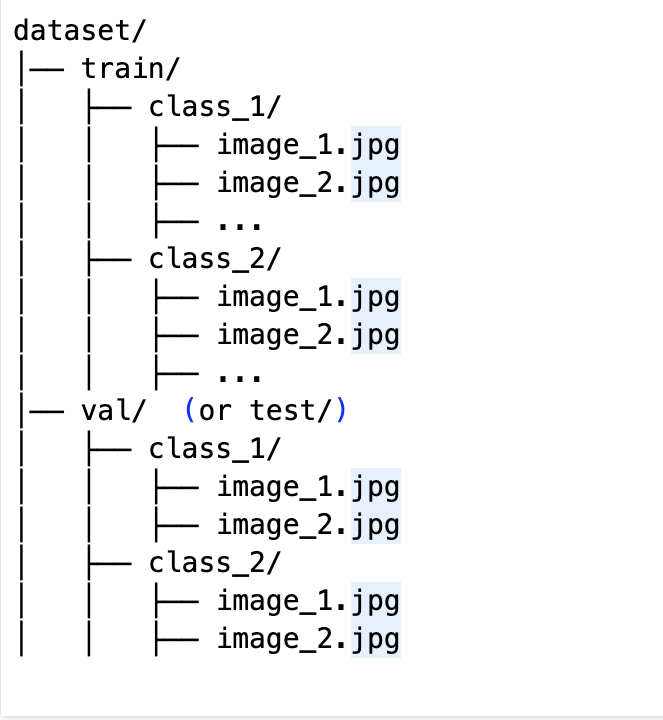



## 7. (Answer, 5 points) Read the following code (copied from [this file](https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py)) for defining the original ResNet in PyTorch library. Explain how it implements the shortcut connection using plain language.

Hint: Shortcut connection is menioned when we introduce ResNet architectures, or see [this paper](https://arxiv.org/pdf/1512.03385.pdf), Figure 2 and Section 3.2.

In [ ]:
import torch
from torch import Tensor
import torch.nn as nn
from .utils import load_state_dict_from_url
from typing import Type, Any, Callable, Union, List, Optional


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 1000,
        zero_init_residual: bool = False,
        groups: int = 1,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)  # type: ignore[arg-type]
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)  # type: ignore[arg-type]

    def _make_layer(self, block: Type[Union[BasicBlock, Bottleneck]], planes: int, blocks: int,
                    stride: int = 1, dilate: bool = False) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)


def _resnet(
    arch: str,
    block: Type[Union[BasicBlock, Bottleneck]],
    layers: List[int],
    pretrained: bool,
    progress: bool,
    **kwargs: Any
) -> ResNet:
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet18(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)


def resnet34(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNet-34 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet34', BasicBlock, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet50(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNet-50 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet50', Bottleneck, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet101(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNet-101 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet101', Bottleneck, [3, 4, 23, 3], pretrained, progress,
                   **kwargs)


def resnet152(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)


def resnext50_32x4d(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNeXt-50 32x4d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 4
    return _resnet('resnext50_32x4d', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def resnext101_32x8d(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNeXt-101 32x8d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 8
    return _resnet('resnext101_32x8d', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)


def wide_resnet50_2(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""Wide ResNet-50-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_.
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet50_2', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def wide_resnet101_2(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""Wide ResNet-101-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_.
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet101_2', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)

**Answer:**
The way this is implemented in a ResNet block is that instead of simply passing the input data through the layers, the input is directly added to the output at the end of the block.
The original output is stored in identity and then added to the output.

out += identity

out = self.relu(out)




## 8. (To finish, 20 points) Recall that [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) and [VGG](https://arxiv.org/pdf/1409.1556.pdf) are originally designed for [ImageNet](http://www.image-net.org/) (including 1000 classes). Suppose now you need a classifier for the CIFAR-10 (including 10 classes) dataset and plan to fine tune a pre-trained AlexNet (or a pre-trained VGG network) on CIFAR-10.

(You may change the hyper-parameters, e.g., num_epochs, batch_size, learning_rate, to find a reasonable accuracy)

You may need to read, understand and re-use lots of code from [this tutorial document](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html) for pytorch on fine tuning pre-trained models.
Please choose one from AlexNet and VGG for your implementation.

In [ ]:
# Your code goes here

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for AlexNet/VGG
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load CIFAR-10 dataset
batch_size = 64
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

# Choose model: "alexnet" or "vgg16"
model_name = "alexnet"

if model_name == "alexnet":
    model = models.alexnet(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Replace last FC layer
elif model_name == "vgg16":
    model = models.vgg16(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Replace last FC layer

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()  # Classification loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Fine-tuning requires a low learning rate


num_epochs = 20  # Adjust based on performance

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader)}")

print("Training complete!")

model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

torch.save(model.state_dict(), "fine_tuned_cifar10.pth")
print("Model saved successfully!")



Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20, Loss: 0.5705697452053999
Epoch 2/20, Loss: 0.3389969715072066
Epoch 3/20, Loss: 0.2603973904743676
Epoch 4/20, Loss: 0.20503842559121455
Epoch 5/20, Loss: 0.17159853265870867


In [ ]:
# convert this file "HW3_CNN_to_Canvas.ipynb" to "HW3_CNN_to_Canvas.html"
!jupyter nbconvert --to html HW3_CNN_to_Canvas.ipynb

[NbConvertApp] Converting notebook HW3_CNN_to_Canvas.ipynb to html
[NbConvertApp] Writing 764015 bytes to HW3_CNN_to_Canvas.html
